In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
path='/content/drive/MyDrive/datasets/diabetes_prediction_dataset.csv'

In [4]:
# Importing dataset
dataset = pd.read_csv(path)

In [5]:
# Preview data
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# Dataset dimensions - (rows, columns)
dataset.shape

(100000, 9)

In [7]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [9]:
# Count of null values
dataset.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


<Axes: xlabel='diabetes', ylabel='count'>

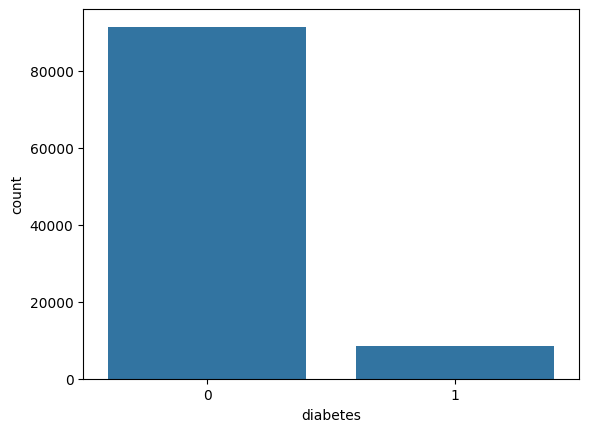

In [10]:
# Outcome countplot
sns.countplot(x = 'diabetes',data = dataset)

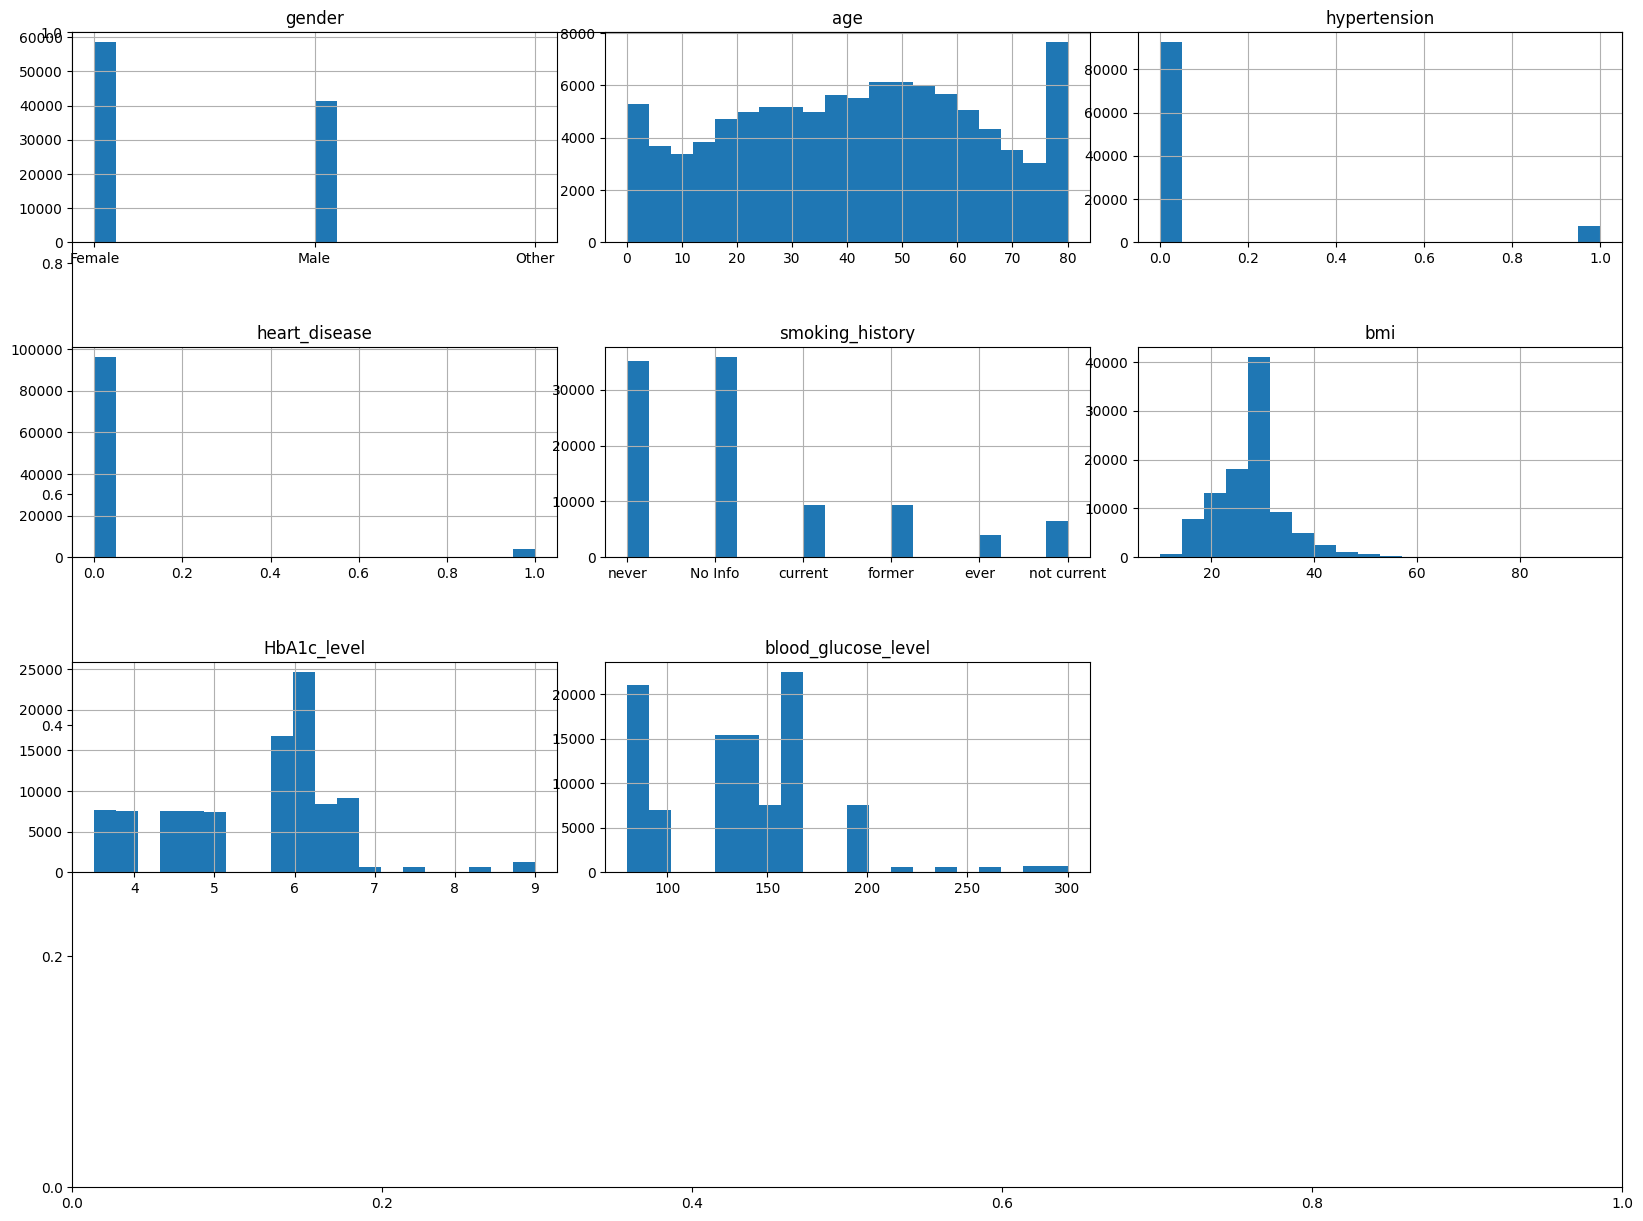

In [11]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length//2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

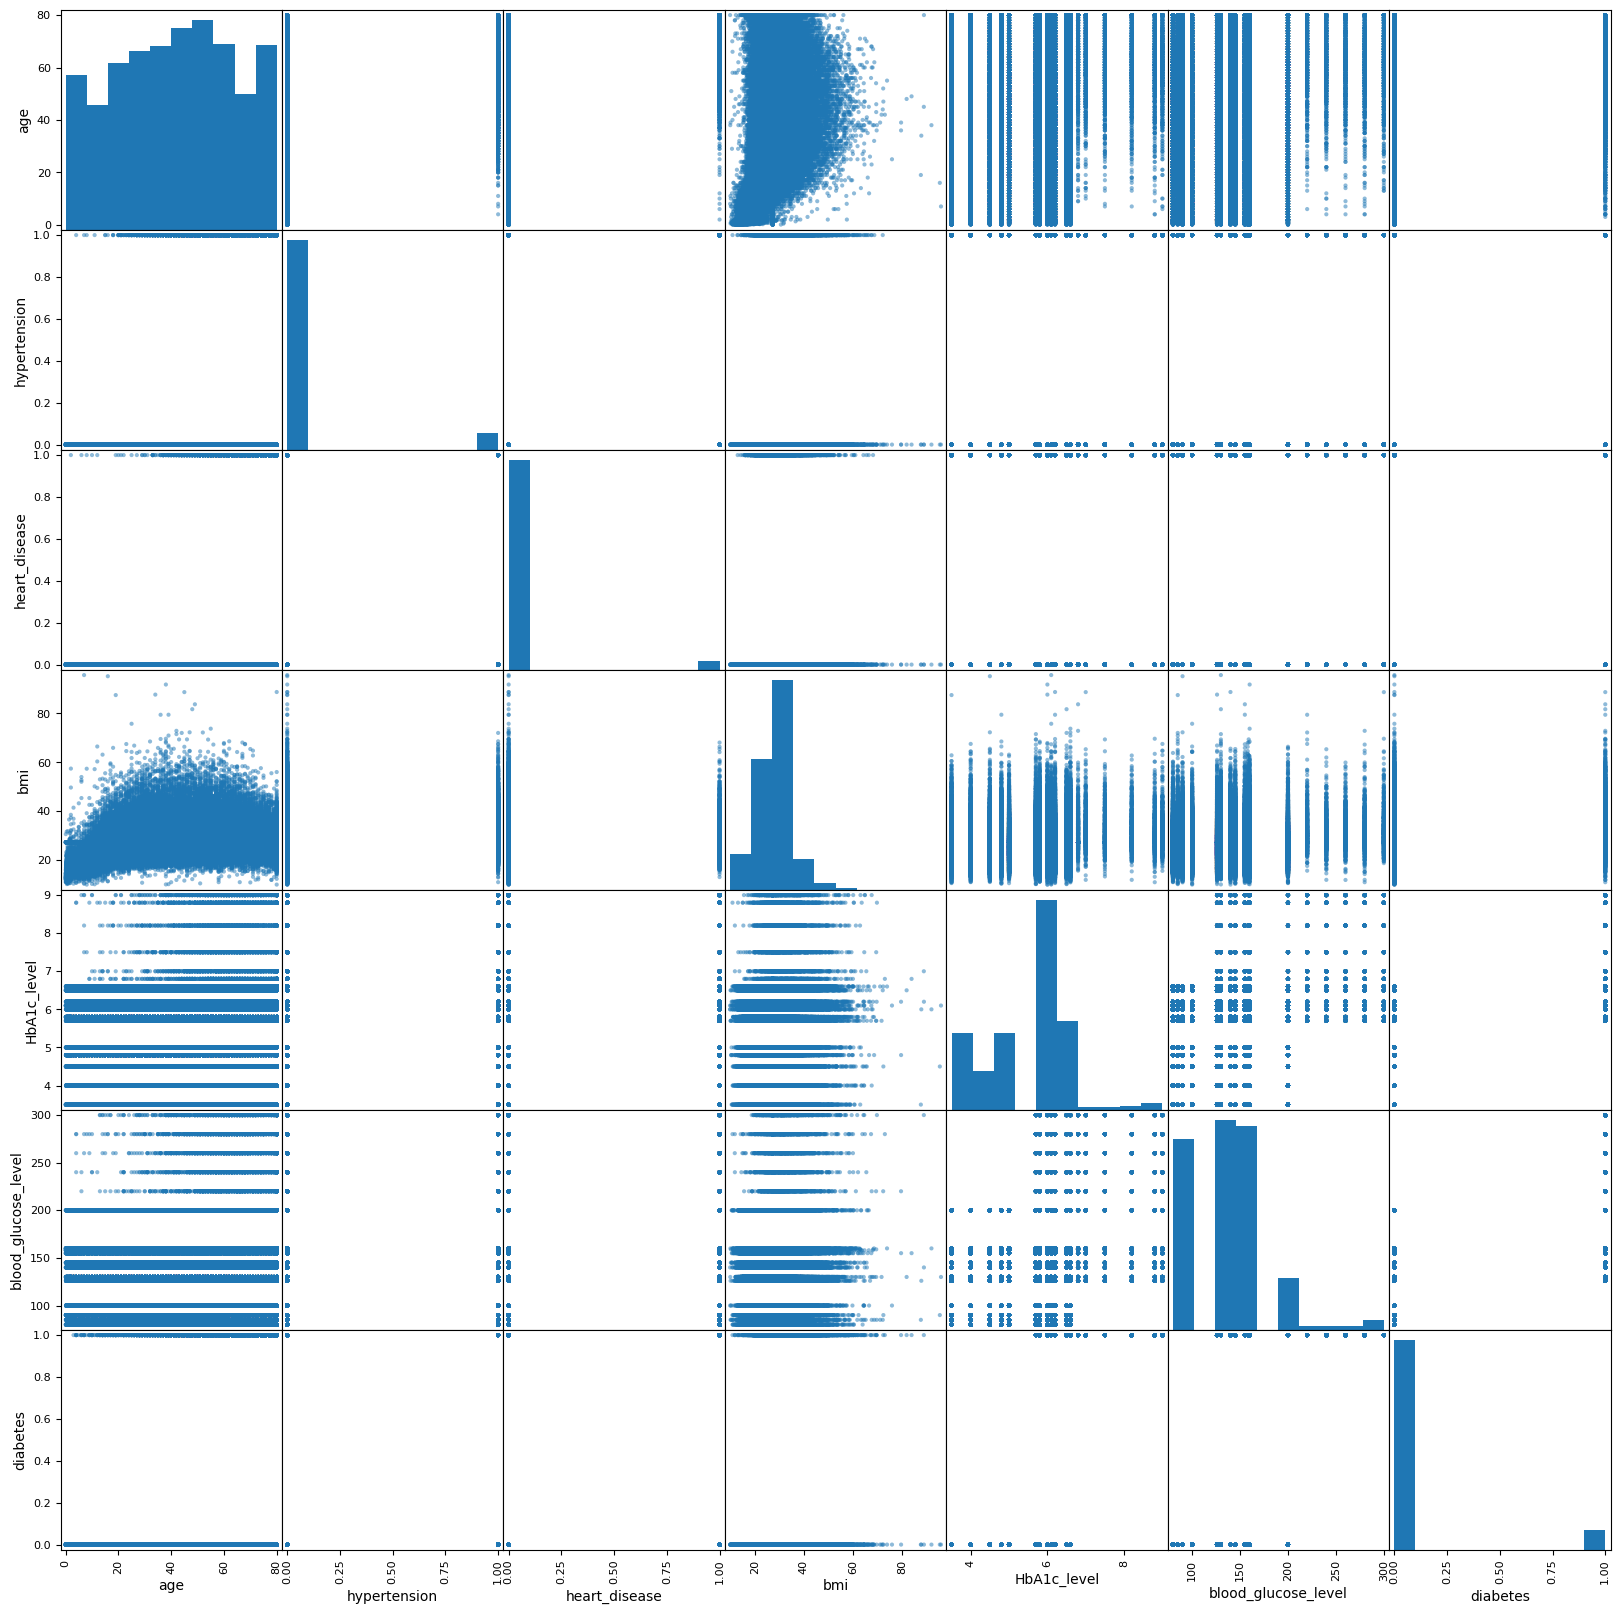

In [12]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

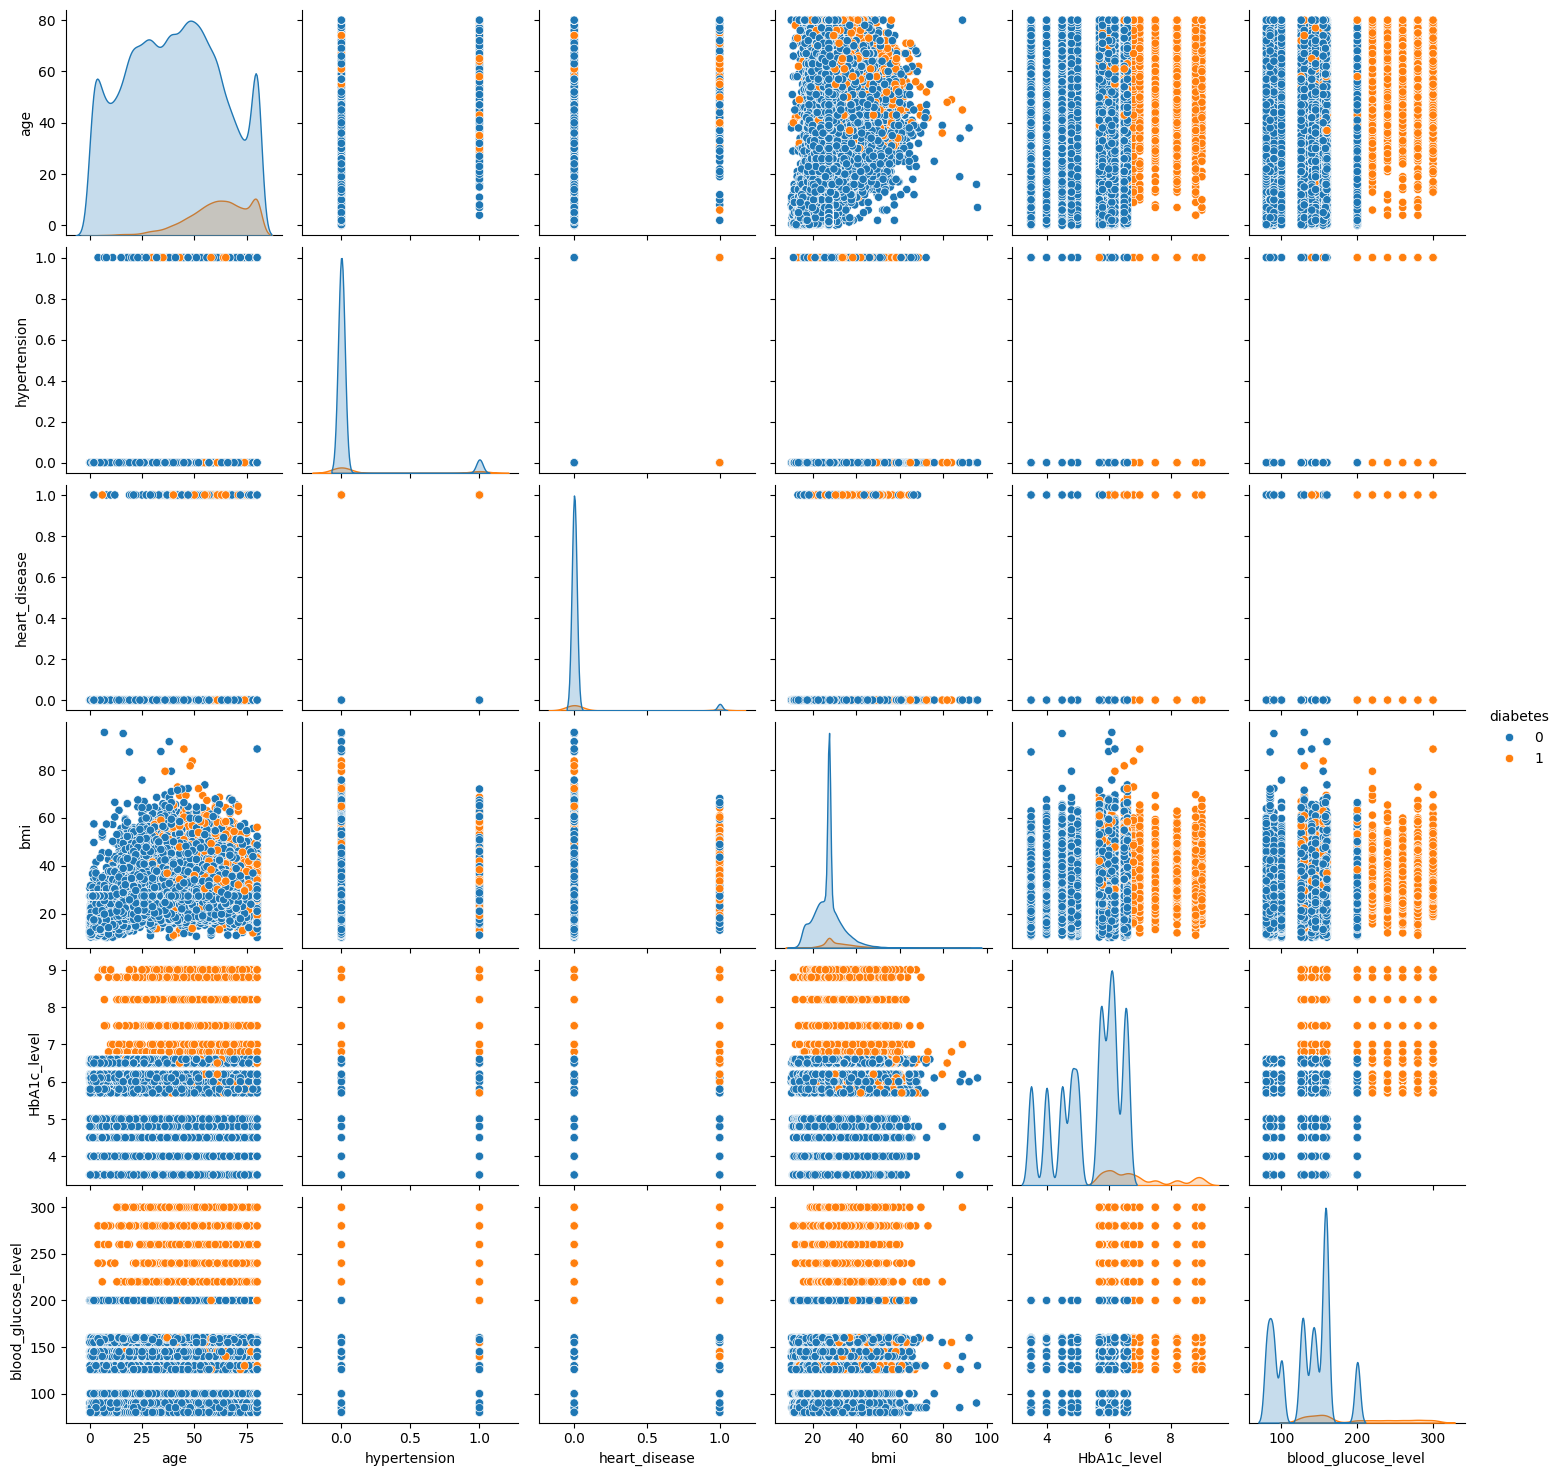

In [13]:
# Pairplot
sns.pairplot(data = dataset, hue = 'diabetes')
plt.show()

In [14]:
dataset = pd.get_dummies(dataset, drop_first=True)

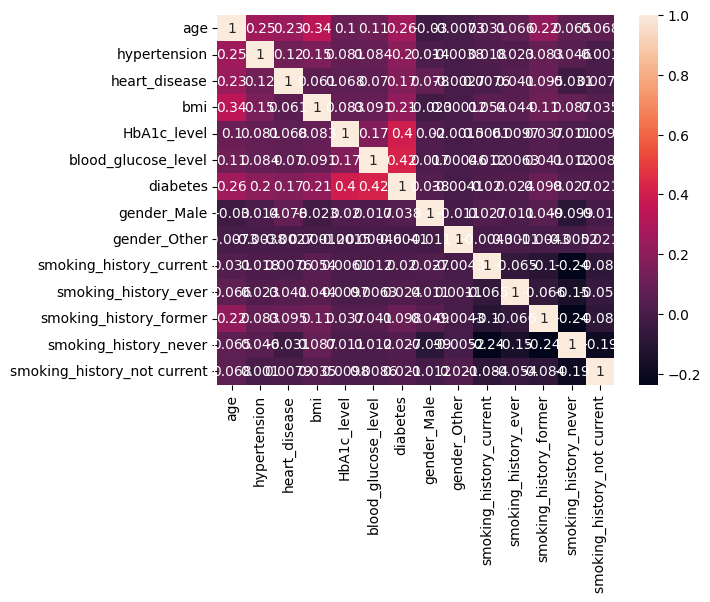

In [15]:
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [16]:
dataset_new = dataset

In [17]:
columns_to_replace = ["bmi", "HbA1c_level", "blood_glucose_level"]
dataset[columns_to_replace] = dataset[columns_to_replace].replace(0, np.NaN)

In [18]:
# Count of NaN
dataset_new.isnull().sum()

,0
age,0
hypertension,0
heart_disease,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0
gender_Male,0
gender_Other,0
smoking_history_current,0


In [19]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [20]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [21]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [22]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [23]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['diabetes'])

In [24]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (80000, 4)
X_test shape: (20000, 4)
Y_train shape: (80000,)
Y_test shape: (20000,)


In [25]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

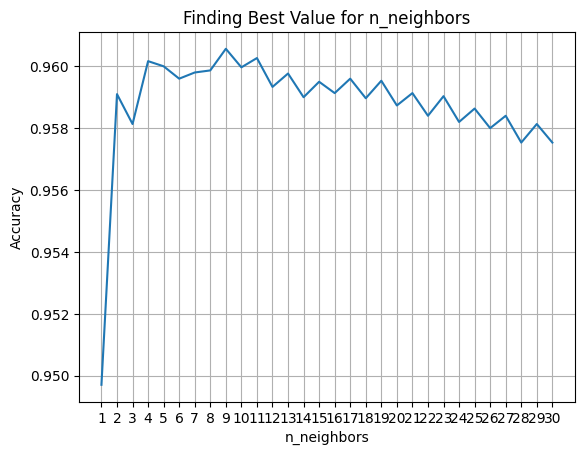

Highest Accuracy Value: 0.9605666666666667


In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select relevant features and target variable
# Replace "your_target_column" with the actual target column in your dataset, e.g., "diabetes"
X = dataset.drop(columns=['diabetes'])  # Adjust this based on your target column name
Y = dataset['diabetes']

# Convert categorical features to numerical if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range for n_neighbors values
X_axis = list(range(1, 31))
acc = pd.Series(dtype="float")  # Initialize an empty Series to store accuracy values

# Loop through each n_neighbors value to train and evaluate the model
for i in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scaled, Y_train)
    prediction = knn_model.predict(X_test_scaled)
    acc.loc[i] = metrics.accuracy_score(prediction, Y_test)  # Store accuracy for each n_neighbors

# Plot the accuracy vs. n_neighbors
plt.plot(X_axis, acc)
plt.xticks(X_axis)
plt.title("Finding Best Value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest Accuracy Value:', acc.values.max())

In [27]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [28]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)


SVC(kernel='linear', random_state=42)

In [29]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [30]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [32]:
# Ensure consistent preprocessing for training and test datasets
X = dataset.drop(columns=['diabetes'])  # Replace 'diabetes' with your target column
Y = dataset['diabetes']

# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
logreg = LogisticRegression().fit(X_train, Y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
svc = SVC().fit(X_train, Y_train)
nb = GaussianNB().fit(X_train, Y_train)
dectree = DecisionTreeClassifier().fit(X_train, Y_train)
ranfor = RandomForestClassifier().fit(X_train, Y_train)

# Make predictions
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)


In [33]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [34]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 95.92
K Nearest neighbors: 96.0
Support Vector Classifier: 96.15666666666667
Naive Bayes: 26.700000000000003
Decision tree: 95.32333333333334
Random Forest: 96.99666666666667


In [35]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[27279,   174],
       [ 1026,  1521]])

<Axes: >

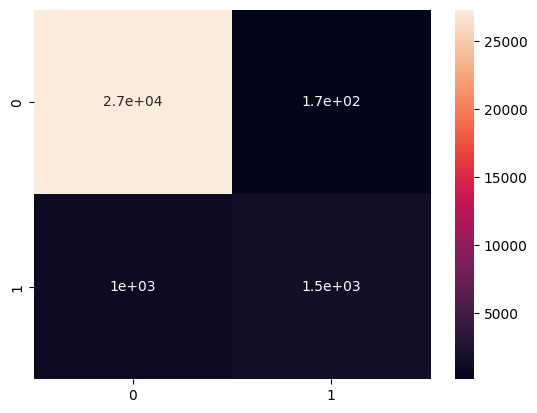

In [36]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [37]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.90      0.60      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.93      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000

